In [49]:
import json
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio

In [50]:
with open('data/9_1.json') as f:
    data = json.load(f)


In [51]:
img = imageio.imread('data/9-1.tif')
bbox = []
points = []
for k in data.keys():
    bbox.append(data[k]['boxes'])
    points.append(data[k]['points'])

# create a dictionary with key integer and rgb value
color = {}
for i in range(0, 25):
    #color[i] = random rgb value
    color[i] = np.random.rand(3,)



In [52]:
def show_image(img, bbox, points, slide):
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(img[slide - 1])
    for b in bbox[slide-1]:
        rect = plt.Rectangle((b[0], b[1]+ 10), b[2], b[3], fill=False, edgecolor=color[b[4]], linewidth=2)
        ax.add_patch(rect)
        # add text to the rectangle
        ax.text(b[0], b[1], "id = {}".format(b[4]), color=color[b[4]], fontsize=15)

    for p in points[slide-1]:
        # plt.scatter(p[0], p[1], color =color[p[2]], s=40, marker='+')
        ax.scatter(p[0], p[1], color=color[p[2]], s=40, marker='+')
    
    return fig, ax


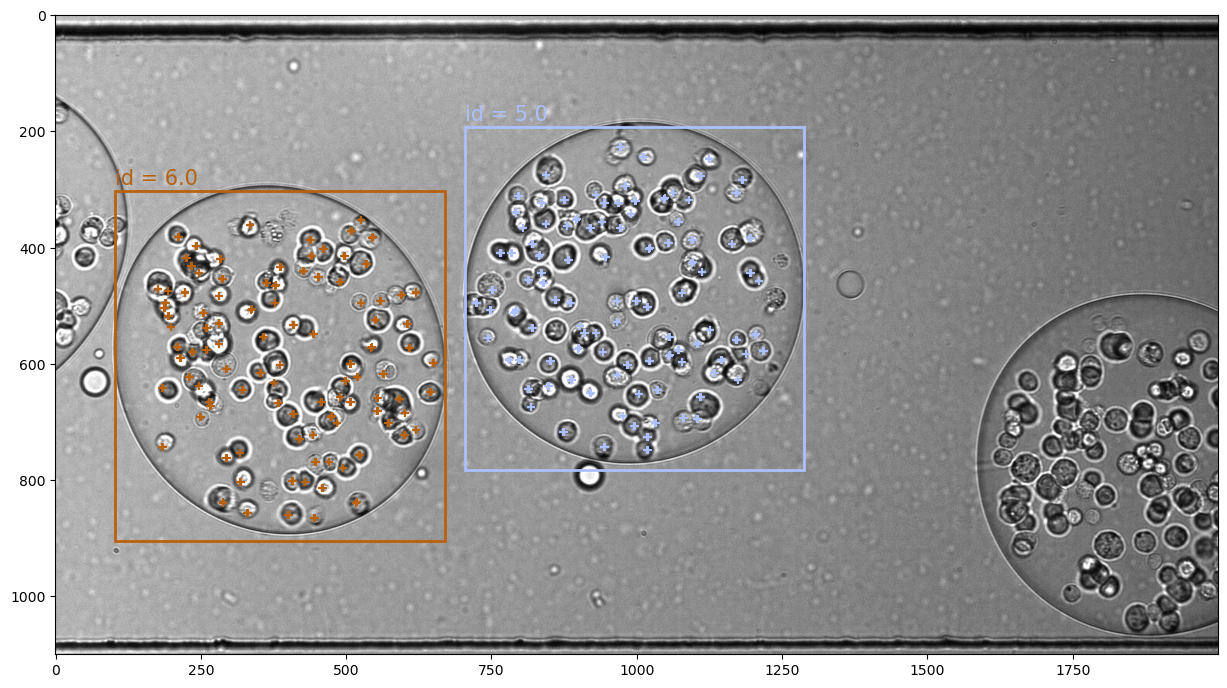

In [61]:
# random int between 1 and 50
slide = np.random.randint(1, 50)

fig, ax = show_image(img, bbox, points, slide)
plt.show()

In [62]:
# create a subfolder img into data folder
# save the image in the subfolder
import os
if not os.path.exists('data/img'):
    os.makedirs('data/img')

for i in range(1, 51):
    fig, ax = show_image(img, bbox, points, i)
    fig.savefig('data/img/slide_{}.png'.format(i))
    plt.close()

In [48]:

for i in range(1, 51):
    fig, ax = show_image(img, bbox, points, i)
    plt.close()
    img[i-1] = fig

# save the images as a tiff diaporama
imageio.mimsave('diaporama.tif', img, format='TIFF')


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Figure'